# Capítulo 6: Árbol de Decisión

## Árboles de Decisión — Qué son y para qué sirven

---

## 1. Clasificación con Árboles de Decisión
**Qué es:**  
Un árbol de decisión es un modelo que divide los datos en regiones basadas en preguntas secuenciales (nodos), permitiendo clasificar ejemplos siguiendo un camino desde la raíz hasta una hoja.

**Para qué sirve:**  
- Resolver problemas de **clasificación** binaria o multiclase.  
- Tomar decisiones interpretables paso a paso.  
- Trabajar sin necesidad de escalar características.  
- Descubrir interacciones no lineales entre variables.

---

## 2. Probabilidades en Árboles de Decisión
**Qué es:**  
Las probabilidades se calculan a partir de la proporción de ejemplos de cada clase dentro de una hoja del árbol.

**Para qué sirve:**  
- Obtener predicciones probabilísticas y no solo etiquetas.  
- Interpretar el nivel de confianza del modelo.  
- Evaluar riesgos o umbrales en problemas sensibles.

---

## 3. Regresión con Árboles de Decisión
**Qué es:**  
Una variante del árbol de decisión que predice valores numéricos. En lugar de asignar clases, cada hoja contiene un valor promedio del objetivo.

**Para qué sirve:**  
- Resolver problemas de **regresión** con relaciones no lineales.  
- Modelar interacciones complejas sin necesidad de transformar variables.  
- Crear modelos interpretables que dividen el espacio en regiones con valores constantes.



## <span style="color:green">1. Clasificación</span>

In [3]:
#Importar los bibliotecas
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os 

In [4]:
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/main/"
#Complementos con la dirección especifica de la base de datos que queremos.
COMEDIANTES = "Capitulo_6/Comediantes.csv"

#Declara la función para extraer datos
def extraer_datos(root,database):
    csv_path=root+ database
    return pd.read_csv(csv_path)

In [5]:
#Checa los datos y extrae el dataframe 
#Chica, mucho ojo con las variables. Escribirlas en mayúsculas como arriba. 
df=extraer_datos(DOWNLOAD_ROOT,COMEDIANTES)

#Es un dataframe chiquito pero útil :) 
df
#Recuerda que Go es el veredicto de si será o no será comediante

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


In [11]:
#Utiliza el label_encoder para asignar un valor numérico a Nacionalidad y a Go
from sklearn.preprocessing import LabelEncoder
#verifica que las variables "Nacionality" y "Go" se cambiaron a valores numéricos 
def label_encoder(datos_categoria):
    le = LabelEncoder()
    df[datos_categoria] = le.fit_transform(df[datos_categoria])
    
variables = ["Nationality","Go"]
for i in variables:
        label_encoder(i)
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,1,0
1,42,12,4,2,0
2,23,4,6,0,0
3,52,4,4,2,0
4,43,21,8,2,1
5,44,14,5,1,0
6,66,3,7,0,1
7,35,14,9,1,1
8,52,13,7,0,1
9,35,5,9,0,1


In [12]:
#Separa en dos partes el dataframe 
y = df["Go"] #Variable objetivo
x = df.drop("Go", axis=1) #Variables predictoras hace drop para eliminar la columna Go

In [13]:
#verifica que se haya hecho la separación 
x
y

0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64

In [14]:
#Carnita del asunto:Haz el clasificador de DecisionTree
    #Importa la función
from sklearn.tree import DecisionTreeClassifier

    #Haz el objeto 
indeciso = DecisionTreeClassifier()
    #Haz el ajuste
indeciso.fit(x, y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.2857142857142857, 0.9, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.14285714285714285, 0.7, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.21428571428571427, 0.8, 'True  '),
 Text(0.42857142857142855, 0.7, 'Rank <= 8.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.3571428571428571, 0.8, '  False'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5714285714285714, 0.5, 'Age <= 35.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7142857142857143, 0.3, 'Age <= 40.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5714285714285714, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8571428571428571, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

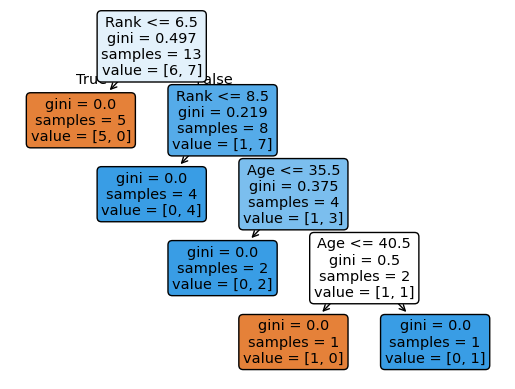

In [15]:
#Gráfica el árbol de decisión 
from sklearn import tree
tree.plot_tree(indeciso, feature_names=x.columns,rounded=True, filled=True)

***

## <span style="color:green">2. Probabilidades</span>

También permite estimar probabilidades. Lo veremos con un ejemplo:

In [17]:
#Selecciona una persona aleatoria para estimar su probabilidad y juega con las variables 
indeciso.predict_proba([[10, 1, 0, 5]]) #El orden de las variables esta como: **Edad, experiencia, rango y nacionalidad**

d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[1., 0.]])

 -El orden de las variables esta como: **Edad, experiencia, rango y nacionalidad**

El resultado esta como : lado izquierdo= No comediante - lado derecho=Comediante

---

## <span style="color:green">3. Regresión</span>

Los árboles de decisión tambien pueden hacer regresiones lineales.

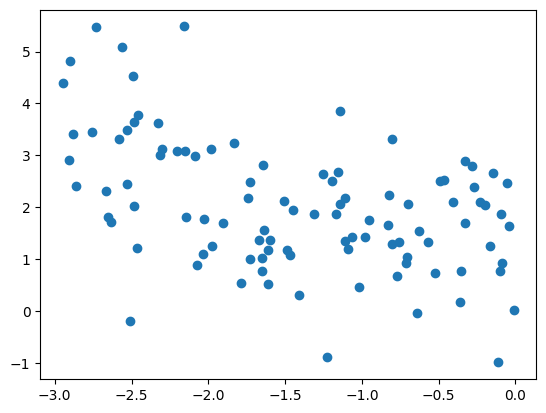

In [19]:
#Genera 100 número aleatorios y añade un poco de aleatoriedad 
pendiente = 100
x = 3 * np.random.rand(pendiente,1) - 3
y = 2 + x + 0.5 *x**2 + np.random.randn(pendiente,1)
#np.c_[([x])]
plt.scatter(x,y)

In [20]:
#Crea un  árbol de decisión con un hiperparametro de 2
from sklearn.tree import DecisionTreeRegressor
indeciso_reg = DecisionTreeRegressor(max_depth=2)
indeciso_reg.fit(x,y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


[Text(0.5, 0.8333333333333334, 'x[0] <= -2.08\nsquared_error = 1.572\nsamples = 100\nvalue = 2.019'),
 Text(0.25, 0.5, 'x[0] <= -2.7\nsquared_error = 1.63\nsamples = 28\nvalue = 3.152'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 1.024\nsamples = 7\nvalue = 3.838'),
 Text(0.375, 0.16666666666666666, 'squared_error = 1.623\nsamples = 21\nvalue = 2.923'),
 Text(0.75, 0.5, 'x[0] <= -0.127\nsquared_error = 0.855\nsamples = 72\nvalue = 1.578'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.774\nsamples = 65\nvalue = 1.645'),
 Text(0.875, 0.16666666666666666, 'squared_error = 1.181\nsamples = 7\nvalue = 0.957')]

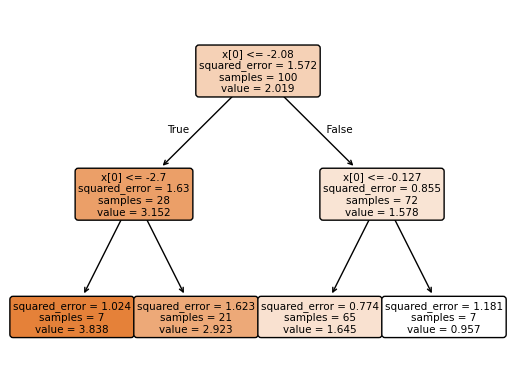

In [21]:
#Dale formato a tu arbolito bebé
tree.plot_tree(indeciso_reg, rounded=True, filled=True)

Recuerda que pusimos una profundidad máxima de 2, esto lo decides tu con base a tus objetivos.

KEY: 
    
**mse**= Mean Square Error es equivalente al GINI. Te indica el nivel de impureza.

**nsamples=** Cantidad de muestras por nodo. 

**nvalue=** Valor

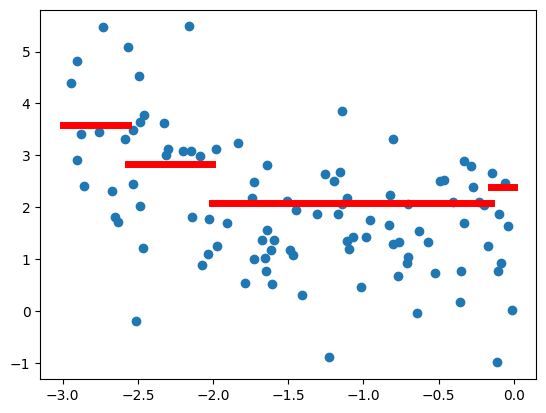

In [22]:
#Hacer gráfica toda complicada :(
x1 = np.linspace(-3,-2.568)
y1 = np.linspace(3.5818,3.5818)
x2 = np.linspace(-2.569,-2.008)
y2 = np.linspace(2.834,2.834)
x3 = np.linspace(-2.009,-0.151)
y3 = np.linspace(2.075,2.075)
x4 = np.linspace(-0.152,0)
y4 = np.linspace(2.392,2.392)
plt.scatter(x,y)
plt.plot(x1,y1,"r-",linewidth=5)
plt.plot(x2,y2,"r-",linewidth=5)
plt.plot(x3,y3,"r-",linewidth=5)
plt.plot(x4,y4,"r-",linewidth=5)

Los nodos se ven representados por cada linea rojo

[Text(0.5, 0.875, 'x[0] <= -2.08\nsquared_error = 1.572\nsamples = 100\nvalue = 2.019'),
 Text(0.25, 0.625, 'x[0] <= -2.7\nsquared_error = 1.63\nsamples = 28\nvalue = 3.152'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[0] <= -2.743\nsquared_error = 1.024\nsamples = 7\nvalue = 3.838'),
 Text(0.0625, 0.125, 'squared_error = 0.678\nsamples = 6\nvalue = 3.567'),
 Text(0.1875, 0.125, 'squared_error = -0.0\nsamples = 1\nvalue = 5.467'),
 Text(0.375, 0.375, 'x[0] <= -2.609\nsquared_error = 1.623\nsamples = 21\nvalue = 2.923'),
 Text(0.3125, 0.125, 'squared_error = 0.067\nsamples = 3\nvalue = 1.948'),
 Text(0.4375, 0.125, 'squared_error = 1.697\nsamples = 18\nvalue = 3.086'),
 Text(0.75, 0.625, 'x[0] <= -0.127\nsquared_error = 0.855\nsamples = 72\nvalue = 1.578'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[0] <= -0.342\nsquared_error = 0.774\nsamples = 65\nvalue = 1.645'),
 Text(0.5625, 0.125, 'squared_error = 0.788\nsamples = 57\nvalue = 1.563'),
 Text(0.6875, 0.125, 'squ

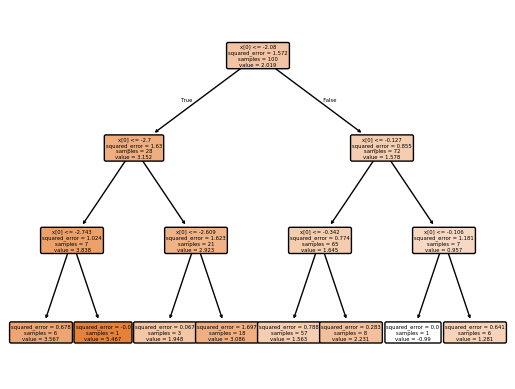

In [23]:
#Arreglar el sobreajuste poniendo una profundidad máxima mayor a la anterior. Ej: 3. 
from sklearn.tree import DecisionTreeRegressor
arbol = DecisionTreeRegressor(max_depth=3)
arbol.fit(x,y)
#Gráficalo 
tree.plot_tree(arbol,rounded=True,filled=True)
#tree.plot_tree(arbol,rounded=True,filled=True,fontsize=15)Para hacer más grande la letra ajustar fontsize

In [24]:
#Haz un árbol de decisiones sin restricciones
from sklearn.tree import DecisionTreeRegressor
arbol = DecisionTreeRegressor()
arbol.fit(x,y)


,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


[Text(0.5037109375, 0.975, 'x[0] <= -2.08\nsquared_error = 1.572\nsamples = 100\nvalue = 2.019'),
 Text(0.10435855263157895, 0.925, 'x[0] <= -2.7\nsquared_error = 1.63\nsamples = 28\nvalue = 3.152'),
 Text(0.3040347450657894, 0.95, 'True  '),
 Text(0.06315789473684211, 0.875, 'x[0] <= -2.743\nsquared_error = 1.024\nsamples = 7\nvalue = 3.838'),
 Text(0.05263157894736842, 0.825, 'x[0] <= -2.891\nsquared_error = 0.678\nsamples = 6\nvalue = 3.567'),
 Text(0.031578947368421054, 0.775, 'x[0] <= -2.904\nsquared_error = 0.674\nsamples = 3\nvalue = 4.04'),
 Text(0.021052631578947368, 0.725, 'x[0] <= -2.926\nsquared_error = 0.556\nsamples = 2\nvalue = 3.651'),
 Text(0.010526315789473684, 0.675, 'squared_error = 0.0\nsamples = 1\nvalue = 4.397'),
 Text(0.031578947368421054, 0.675, 'squared_error = -0.0\nsamples = 1\nvalue = 2.905'),
 Text(0.042105263157894736, 0.725, 'squared_error = 0.0\nsamples = 1\nvalue = 4.819'),
 Text(0.07368421052631578, 0.775, 'x[0] <= -2.809\nsquared_error = 0.234\nsamp

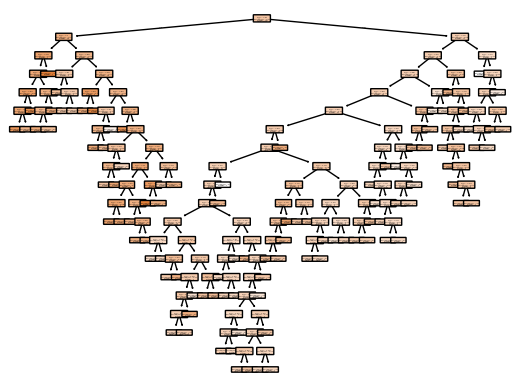

In [25]:
#Gráficalo y asómbrate 
tree.plot_tree(arbol,rounded=True,filled=True)